In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [52]:
def apply_sobel_filter(image):
    image = image.astype(np.float32)
    sobel_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    # Normalizar para convertir a uint8
    sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return sobel

def apply_laplacian_filter(image):
    image = image.astype(np.float32)
    kernel = np.array([[0, 1, 0],
                   [1, -4, 0],
                   [1, 0, 1]], np.float32)

    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image


def apply_gaussian_high_pass_filter(image):
    image = image.astype(np.float32)
    low_pass = cv2.GaussianBlur(image, (21, 21), 10)
    high_pass = image - low_pass
    return high_pass

In [53]:
def apply_prewitt_filter(image):
    image = image.astype(np.float32)
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitt_x = cv2.filter2D(image, -1, kernelx)
    prewitt_y = cv2.filter2D(image, -1, kernely)
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)
    return prewitt

def apply_roberts_cross_filter(image):
    image = image.astype(np.float32)
    roberts_cross_x = np.array([[1, 0], [0, -1]])
    roberts_cross_y = np.array([[0, 1], [-1, 0]])
    roberts_x = cv2.filter2D(image, -1, roberts_cross_x)
    roberts_y = cv2.filter2D(image, -1, roberts_cross_y)
    roberts = np.sqrt(roberts_x**2 + roberts_y**2)
    return roberts

def apply_frequency_domain_high_pass_filter(image):
    image = image.astype(np.float32)
    # Transform picture into a float
    image_float = np.float32(image)
    if len(image_float.shape) == 3:
        # Transform into gray color
        image_gray = cv2.cvtColor(image_float, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_float
    # Apply Fourier
    dft = cv2.dft(image_gray, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = image_gray.shape
    crow, ccol = rows // 2, cols // 2
    # High Pass
    mask = np.ones((rows, cols, 2), np.uint8)
    r = 30
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
    mask[mask_area] = 0
    # Apply mask and tranform it 
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    return img_back


In [63]:
# Load an imag
image = cv2.imread(r'C:\Users\yourk\Pictures\image1-9.jpg')

# Apply filters
sobel_image = apply_sobel_filter(image)
laplacian_image = apply_laplacian_filter(image)
gaussian_hp_image = apply_gaussian_high_pass_filter(image)
prewitt_image = apply_prewitt_filter(image)
roberts_image = apply_roberts_cross_filter(image)
frequency_hp_image = apply_frequency_domain_high_pass_filter(image)

In [64]:
# Convert BGR images to RGB for proper visualization
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img is not None else None for img in
          [image, sobel_image, laplacian_image, gaussian_hp_image, prewitt_image, roberts_image, frequency_hp_image]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-663.0..686.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-224.34..215.52895].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..781.7583].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..359.21024].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [15.101383..265169280.0].


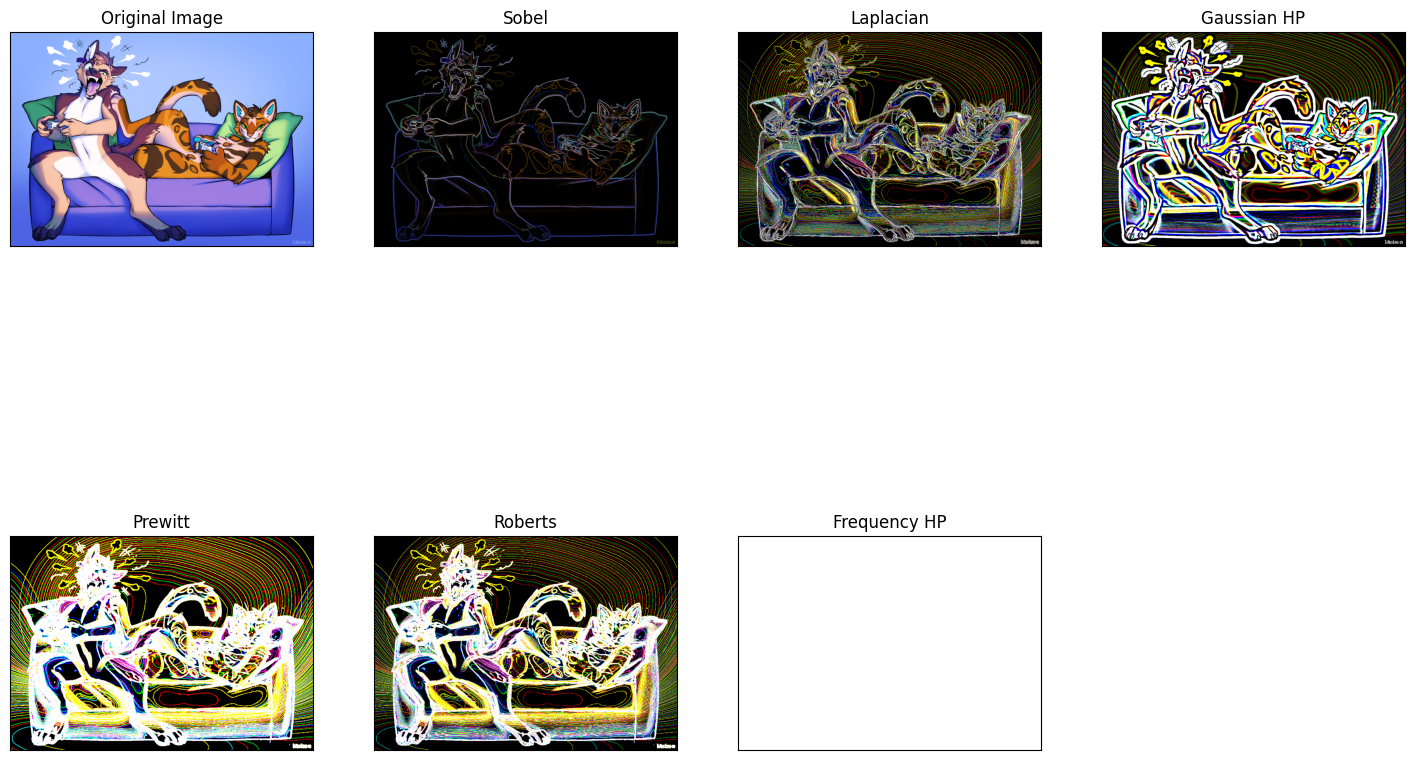

In [65]:
# Display results
titles = ['Original Image', 'Sobel', 'Laplacian', 'Gaussian HP', 'Prewitt', 'Roberts', 'Frequency HP']
plt.figure(figsize=(18, 12))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()